# Questiom

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index, Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10),
Mg: Magnesium, AI: Aluminum, Si: Silicon, K:Potassium, Ca: Calcium, Ba: Barium, Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed,  
 2 --building_windows_non_float_processed, 
 3 --vehicle_windows_float_processed, 
 4 --vehicle_windows_non_float_processed (none in this database), 
 5 --containers, 
 6 --tableware, 
 7 --headlamps, 

In [2]:
# Importing Librareies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
# Importing Dataset

data=pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
data.shape

(214, 10)

In [12]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [15]:
#Print the duplicated rows

data[data.duplicated()]    

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [18]:
data.drop(39)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
data['Type'].unique(), data['Type'].value_counts()

(array([1, 2, 3, 5, 6, 7], dtype=int64),
 2    76
 1    70
 7    29
 3    17
 5    13
 6     9
 Name: Type, dtype: int64)

### Pariplot

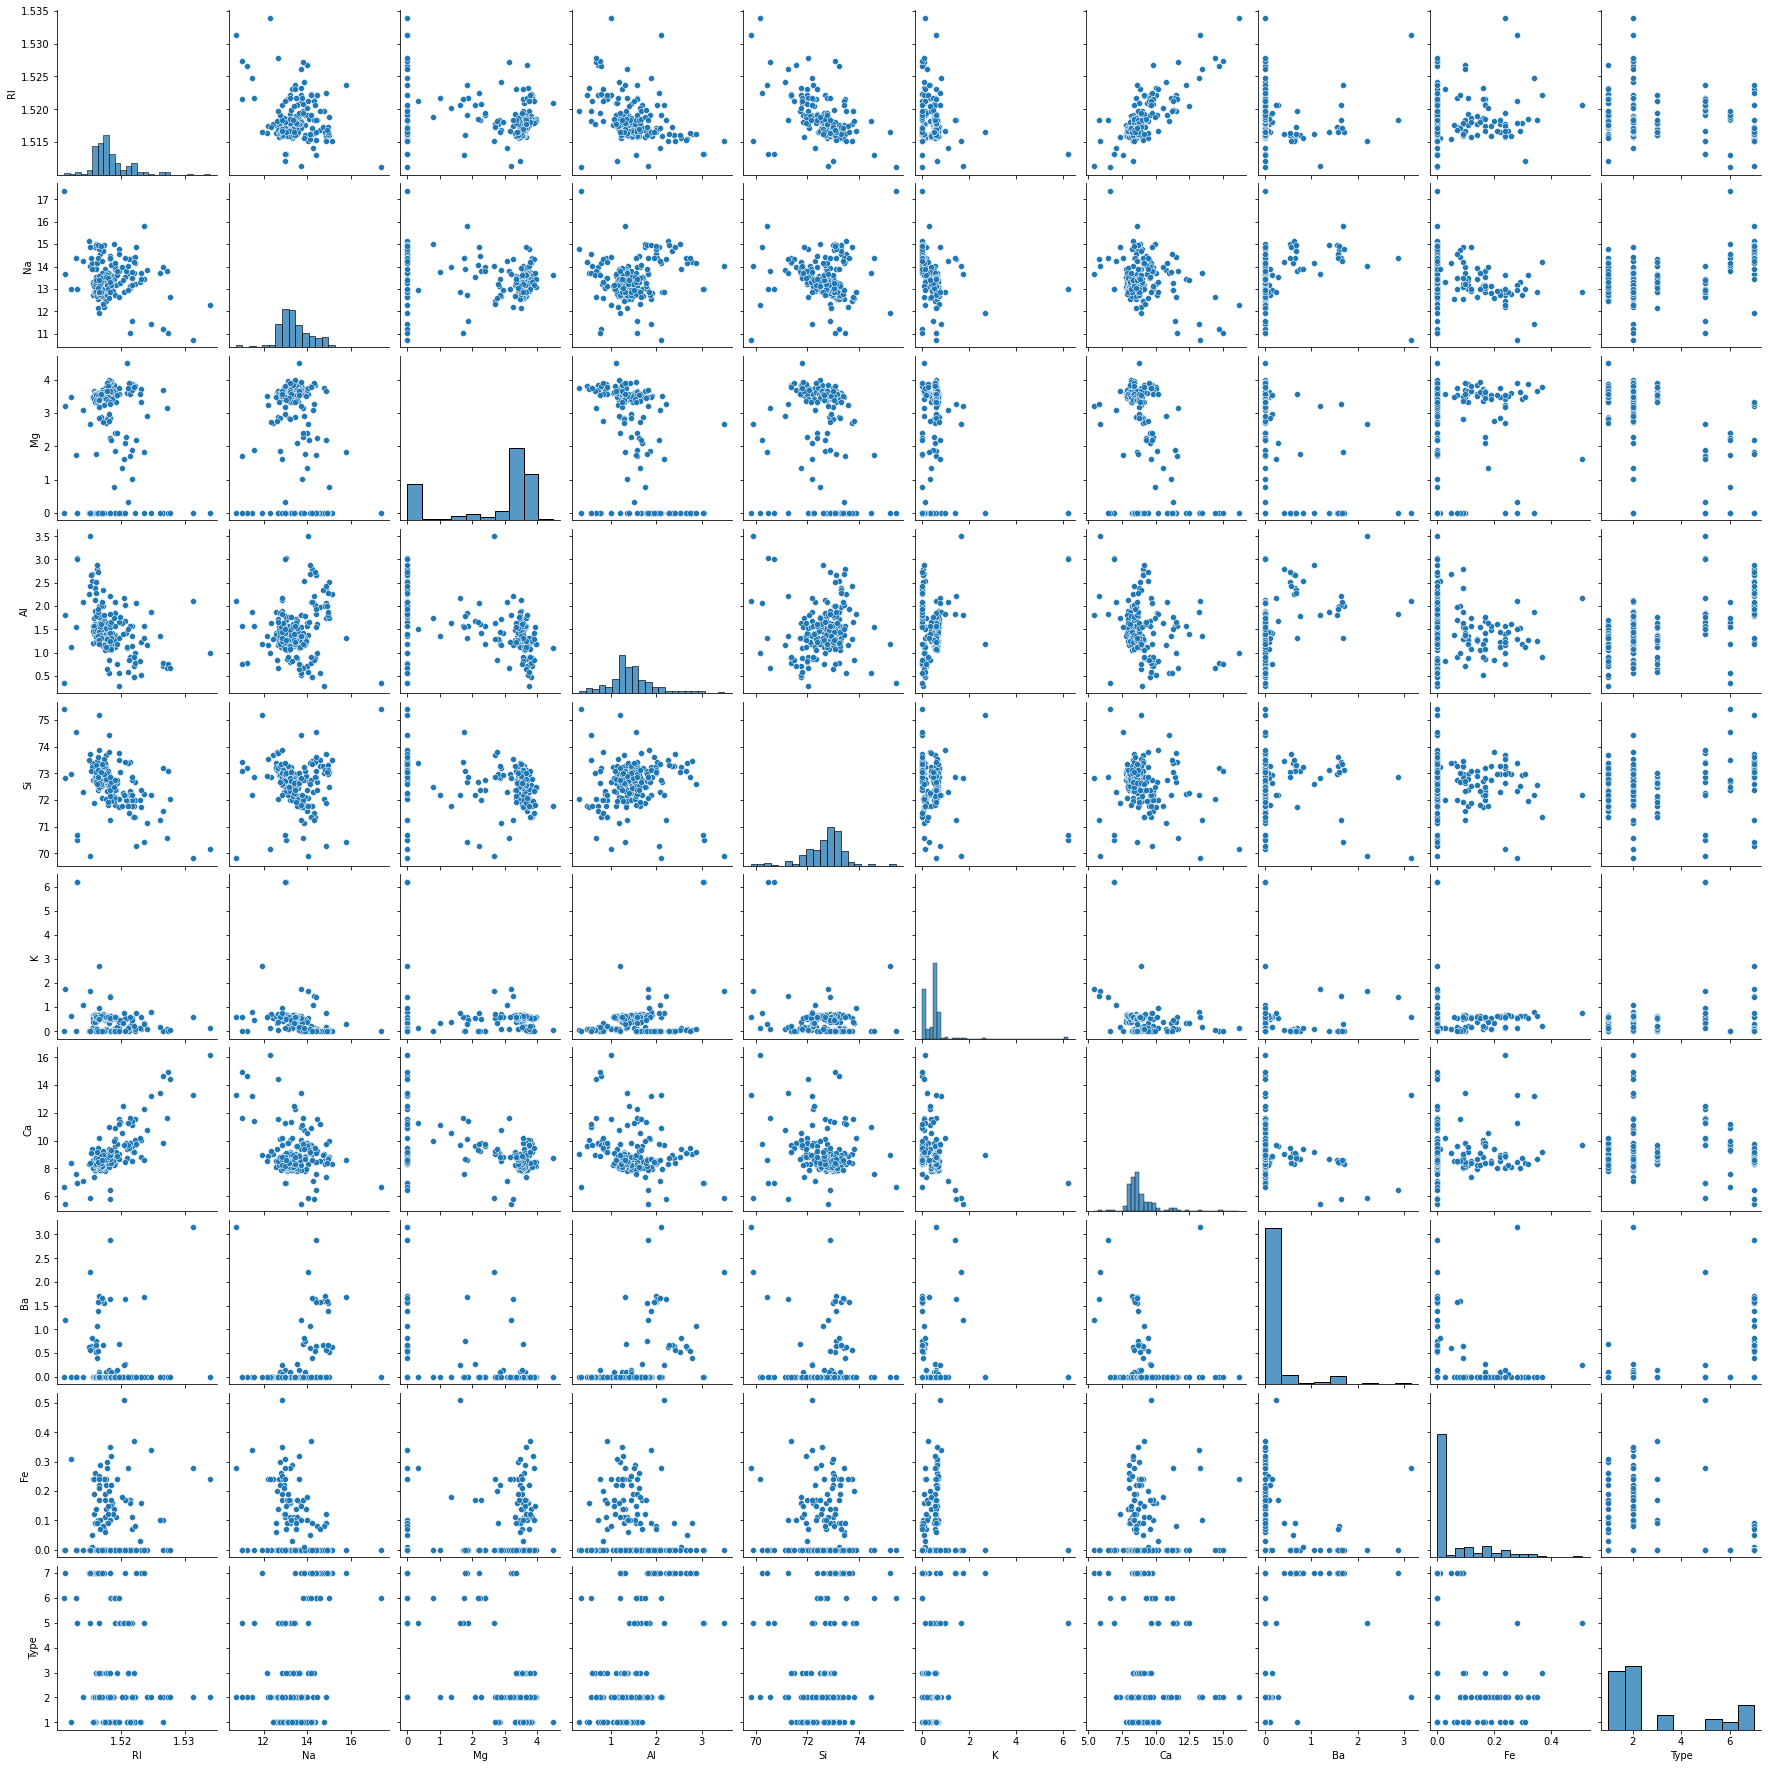

In [19]:
sns.pairplot(data)

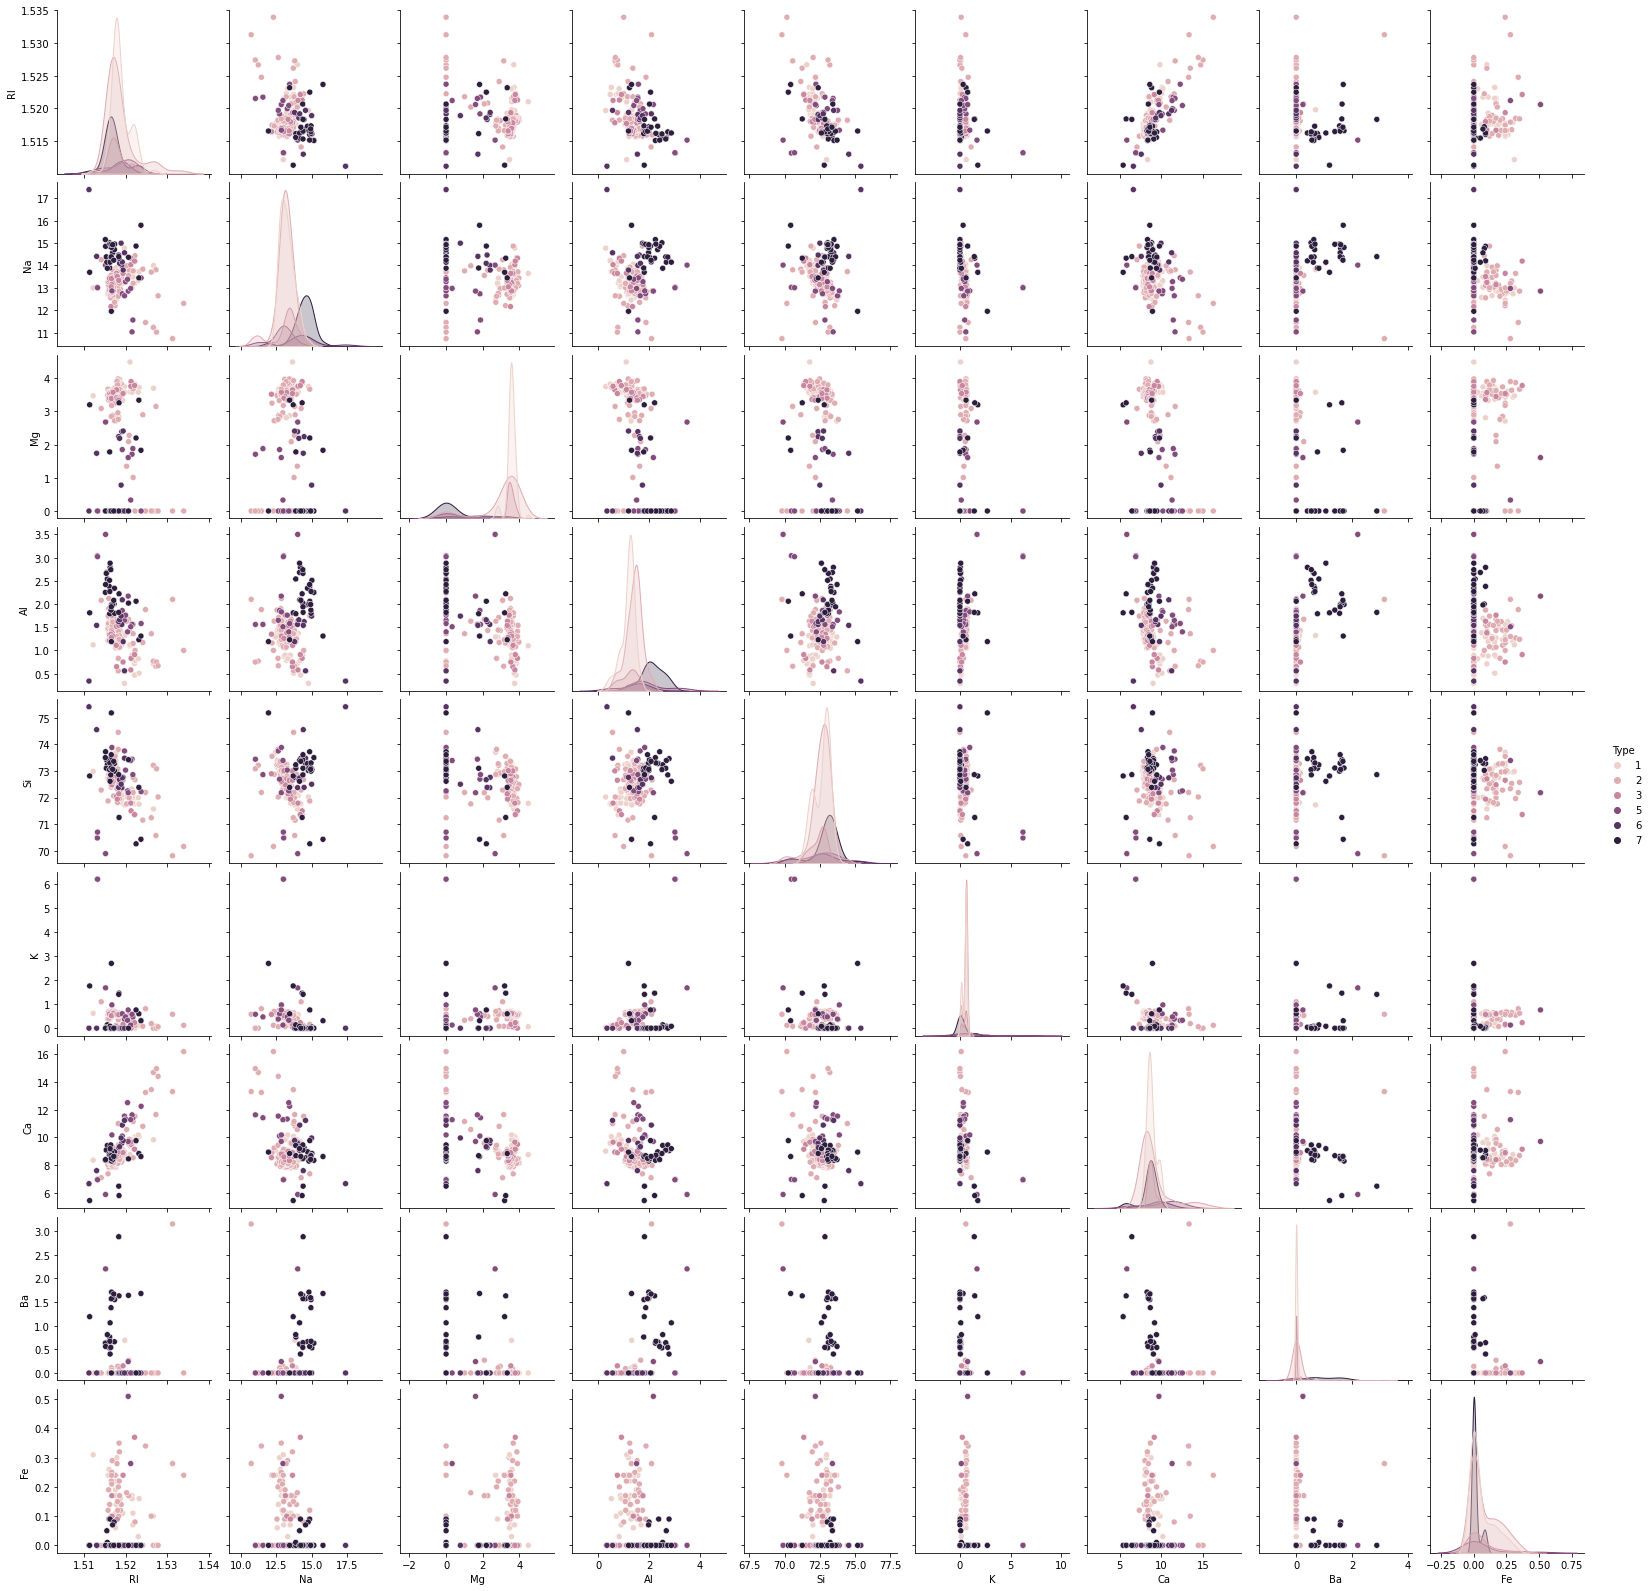

In [42]:
sns.pairplot(data, hue='Type')
plt.show()

### BArplot

Text(0.5, 1.0, 'Type')

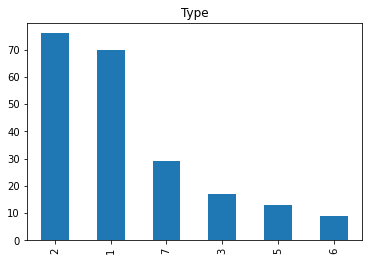

In [20]:
data['Type'].value_counts().plot.bar()
plt.title("Type")

Here type no. 2 are major in dataset and at second place type no. 1 , and then others

### Boxplot and Histogram both in Cell

[<AxesSubplot:xlabel='RI'>, <AxesSubplot:xlabel='RI'>]

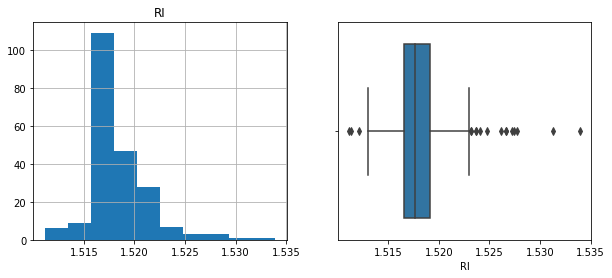

In [21]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['RI'].hist(),plt.title("RI")],
[plt.subplot(1,2,2),sns.boxplot(x=data["RI"])]

[<AxesSubplot:xlabel='Na'>, <AxesSubplot:xlabel='Na'>]

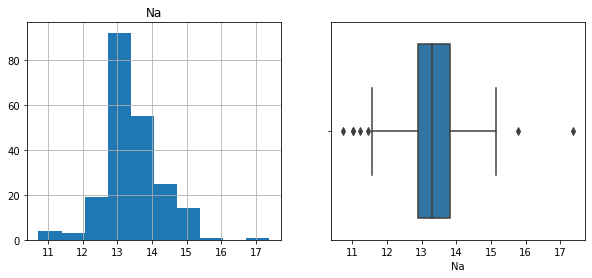

In [22]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Na'].hist(),plt.title("Na")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Na"])]

[<AxesSubplot:xlabel='Mg'>, <AxesSubplot:xlabel='Mg'>]

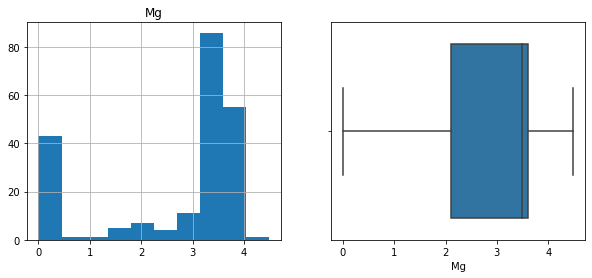

In [23]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Mg'].hist(),plt.title("Mg")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Mg"])]

[<AxesSubplot:xlabel='Al'>, <AxesSubplot:xlabel='Al'>]

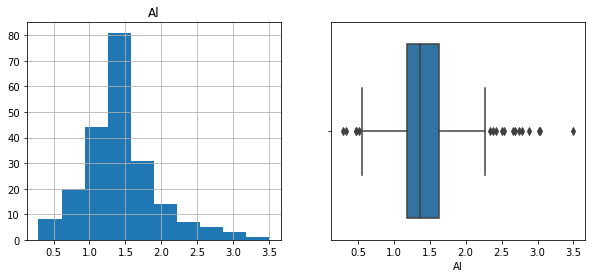

In [24]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Al'].hist(),plt.title("Al")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Al"])]

[<AxesSubplot:xlabel='Si'>, <AxesSubplot:xlabel='Si'>]

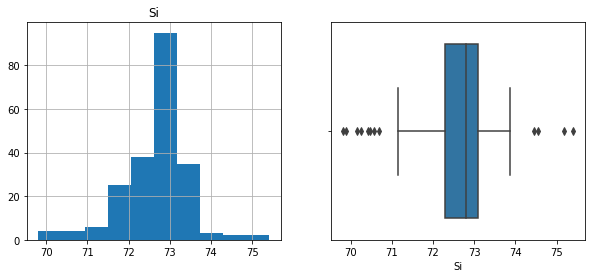

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Si'].hist(),plt.title("Si")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Si"])]

[<AxesSubplot:xlabel='K'>, <AxesSubplot:xlabel='K'>]

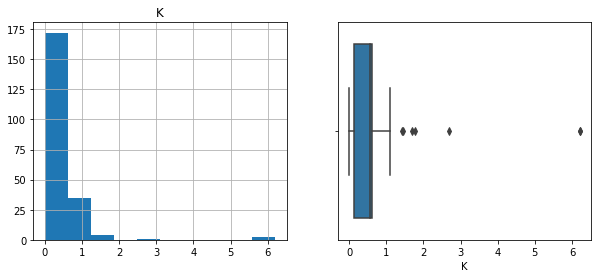

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['K'].hist(),plt.title("K")],
[plt.subplot(1,2,2),sns.boxplot(x=data["K"])]

[<AxesSubplot:xlabel='Ca'>, <AxesSubplot:xlabel='Ca'>]

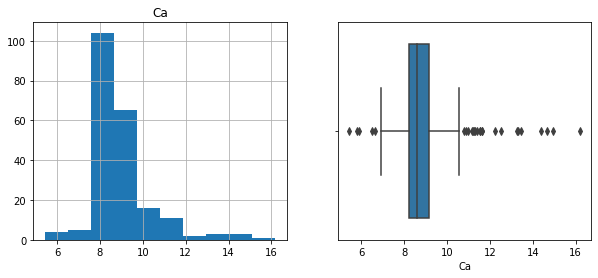

In [27]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Ca'].hist(),plt.title("Ca")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Ca"])]

[<AxesSubplot:xlabel='Ba'>, <AxesSubplot:xlabel='Ba'>]

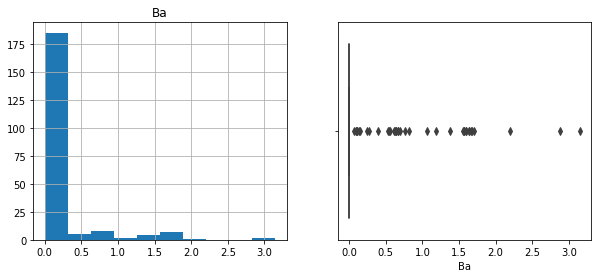

In [28]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Ba'].hist(),plt.title("Ba")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Ba"])]

[<AxesSubplot:xlabel='Fe'>, <AxesSubplot:xlabel='Fe'>]

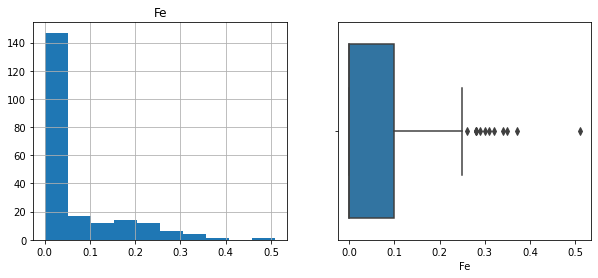

In [29]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data['Fe'].hist(),plt.title("Fe")],
[plt.subplot(1,2,2),sns.boxplot(x=data["Fe"])]

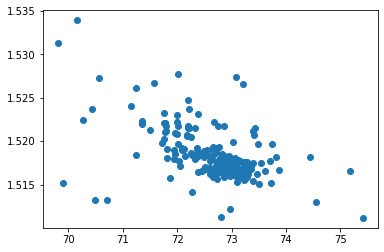

In [35]:
## scatter plot of two variables

plt.scatter(data.Si,data.RI)

### scatter plot of two variables ( scatterplot of Silica with other components of glass dataset)

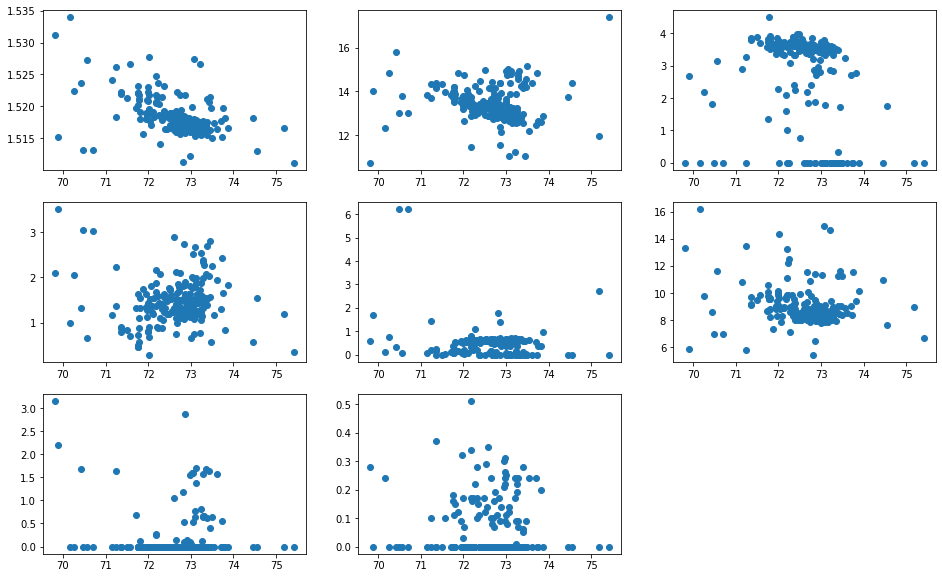

In [37]:
plt.subplots(figsize=(16, 10))

plt.subplot(3,3,1)
plt.scatter(data.Si,data.RI)

plt.subplot(3,3,2)
plt.scatter(data.Si,data.Na)

plt.subplot(3,3,3)
plt.scatter(data.Si,data.Mg)

plt.subplot(3,3,4)
plt.scatter(data.Si,data.Al)

plt.subplot(3,3,5)
plt.scatter(data.Si,data.K)

plt.subplot(3,3,6)
plt.scatter(data.Si,data.Ca)

plt.subplot(3,3,7)
plt.scatter(data.Si,data.Ba)

plt.subplot(3,3,8)
plt.scatter(data.Si,data.Fe)

### Jointplopt

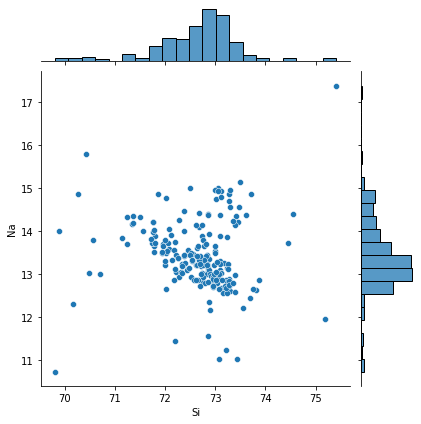

In [41]:
sns.jointplot(x= 'Si', y= 'Na', data=data)
plt.show()

## KNN

In [45]:
# dividing columns in two part 'x' and 'y'

x=data.iloc[:,:10]
y=data['Type']

In [48]:
# selecting numbers of folds

num_folds = 10
kfold = KFold(n_splits=10)

In [49]:
## make model of KNN
## select random numbers of neighbors for model making

model = KNeighborsClassifier(n_neighbors=17)
result = cross_val_score(model, x, y, cv=kfold)

In [53]:
print(results.mean()*100)

67.14285714285714


accuracy = 67.142%

## Searching Grid for Algorithm Tuning

In [55]:
n_neighbor = np.array(range(1,40))
grid = dict(n_neighbors=n_neighbor)

In [57]:
model_new = KNeighborsClassifier()
grid_new = GridSearchCV(estimator=model_new, param_grid=grid)
grid_new.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [58]:
print(grid_new.best_score_)
print(grid_new.best_params_)

0.9627906976744185
{'n_neighbors': 1}


### CV Visualizing and results

In [59]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

In [61]:
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())


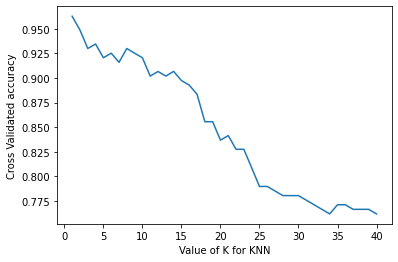

In [63]:
# Ploting Clearity

plt.plot(k_range, k_scores)
plt.ylabel('Cross Validated accuracy')
plt.xlabel('Value of K for KNN')

plt.show()

here graph shows that...cross validation accuracy decrease with value of KNN 

In [64]:
# write few inshights about graphs , graph-details & algorithm